In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [19]:
X, y = fetch_openml("mnist_784", version = 1, return_X_y = True, as_frame = False)
X = X / 255

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

In [21]:
X.shape, y.shape

((70000, 784), (70000,))

In [22]:
hidden_layers = np.array([784, 128, 10])
mlp = MLPClassifier(hidden_layer_sizes = hidden_layers, activation = 'relu', 
                    solver = 'adam', max_iter = 500)


Training set score: 1.000000
Test set score: 0.982071


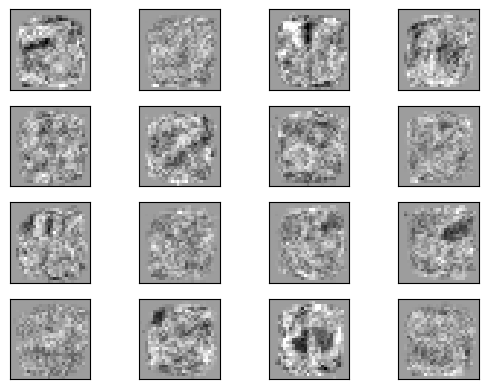

In [23]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()